# Étape 1: Analyse Exploratoire des Données (EDA)

## 1. Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour les graphiques
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

## 2. Chargement des données

In [2]:
df = pd.read_csv("../data/churn_data_processed.csv")

## 3. Vue d'ensemble des données

In [3]:
# Afficher les 5 premières lignes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Informations sur les colonnes et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistiques descriptives pour les colonnes numériques
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## 4. Visualisation de la variable cible (Churn)

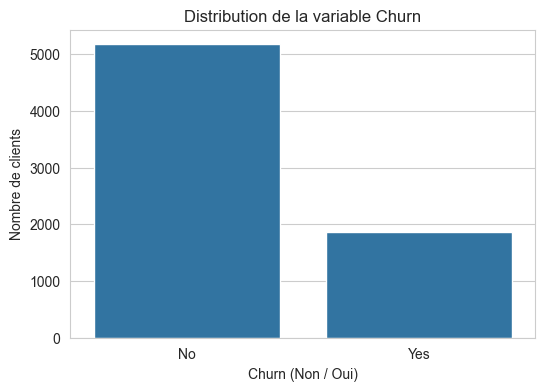

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution de la variable Churn')
plt.xlabel('Churn (Non / Oui)')
plt.ylabel('Nombre de clients')
plt.show()

## 5. Analyse des variables numériques

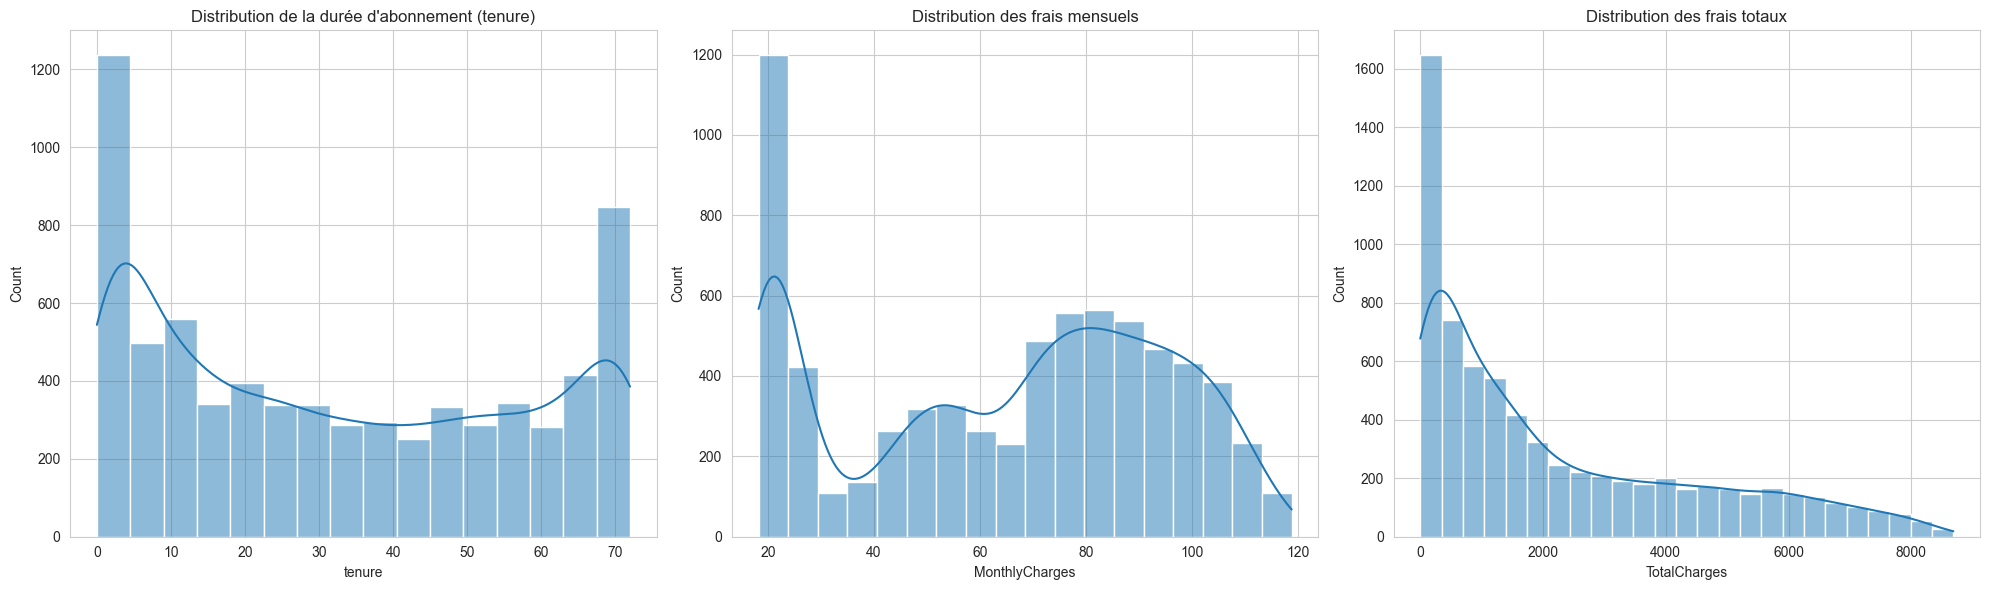

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(df['tenure'], kde=True, ax=axes[0])
axes[0].set_title("Distribution de la durée d'abonnement (tenure)")
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1])
axes[1].set_title('Distribution des frais mensuels')
sns.histplot(df['TotalCharges'], kde=True, ax=axes[2])
axes[2].set_title('Distribution des frais totaux')
plt.tight_layout()
plt.show()

## 6. Analyse des variables catégorielles vs Churn

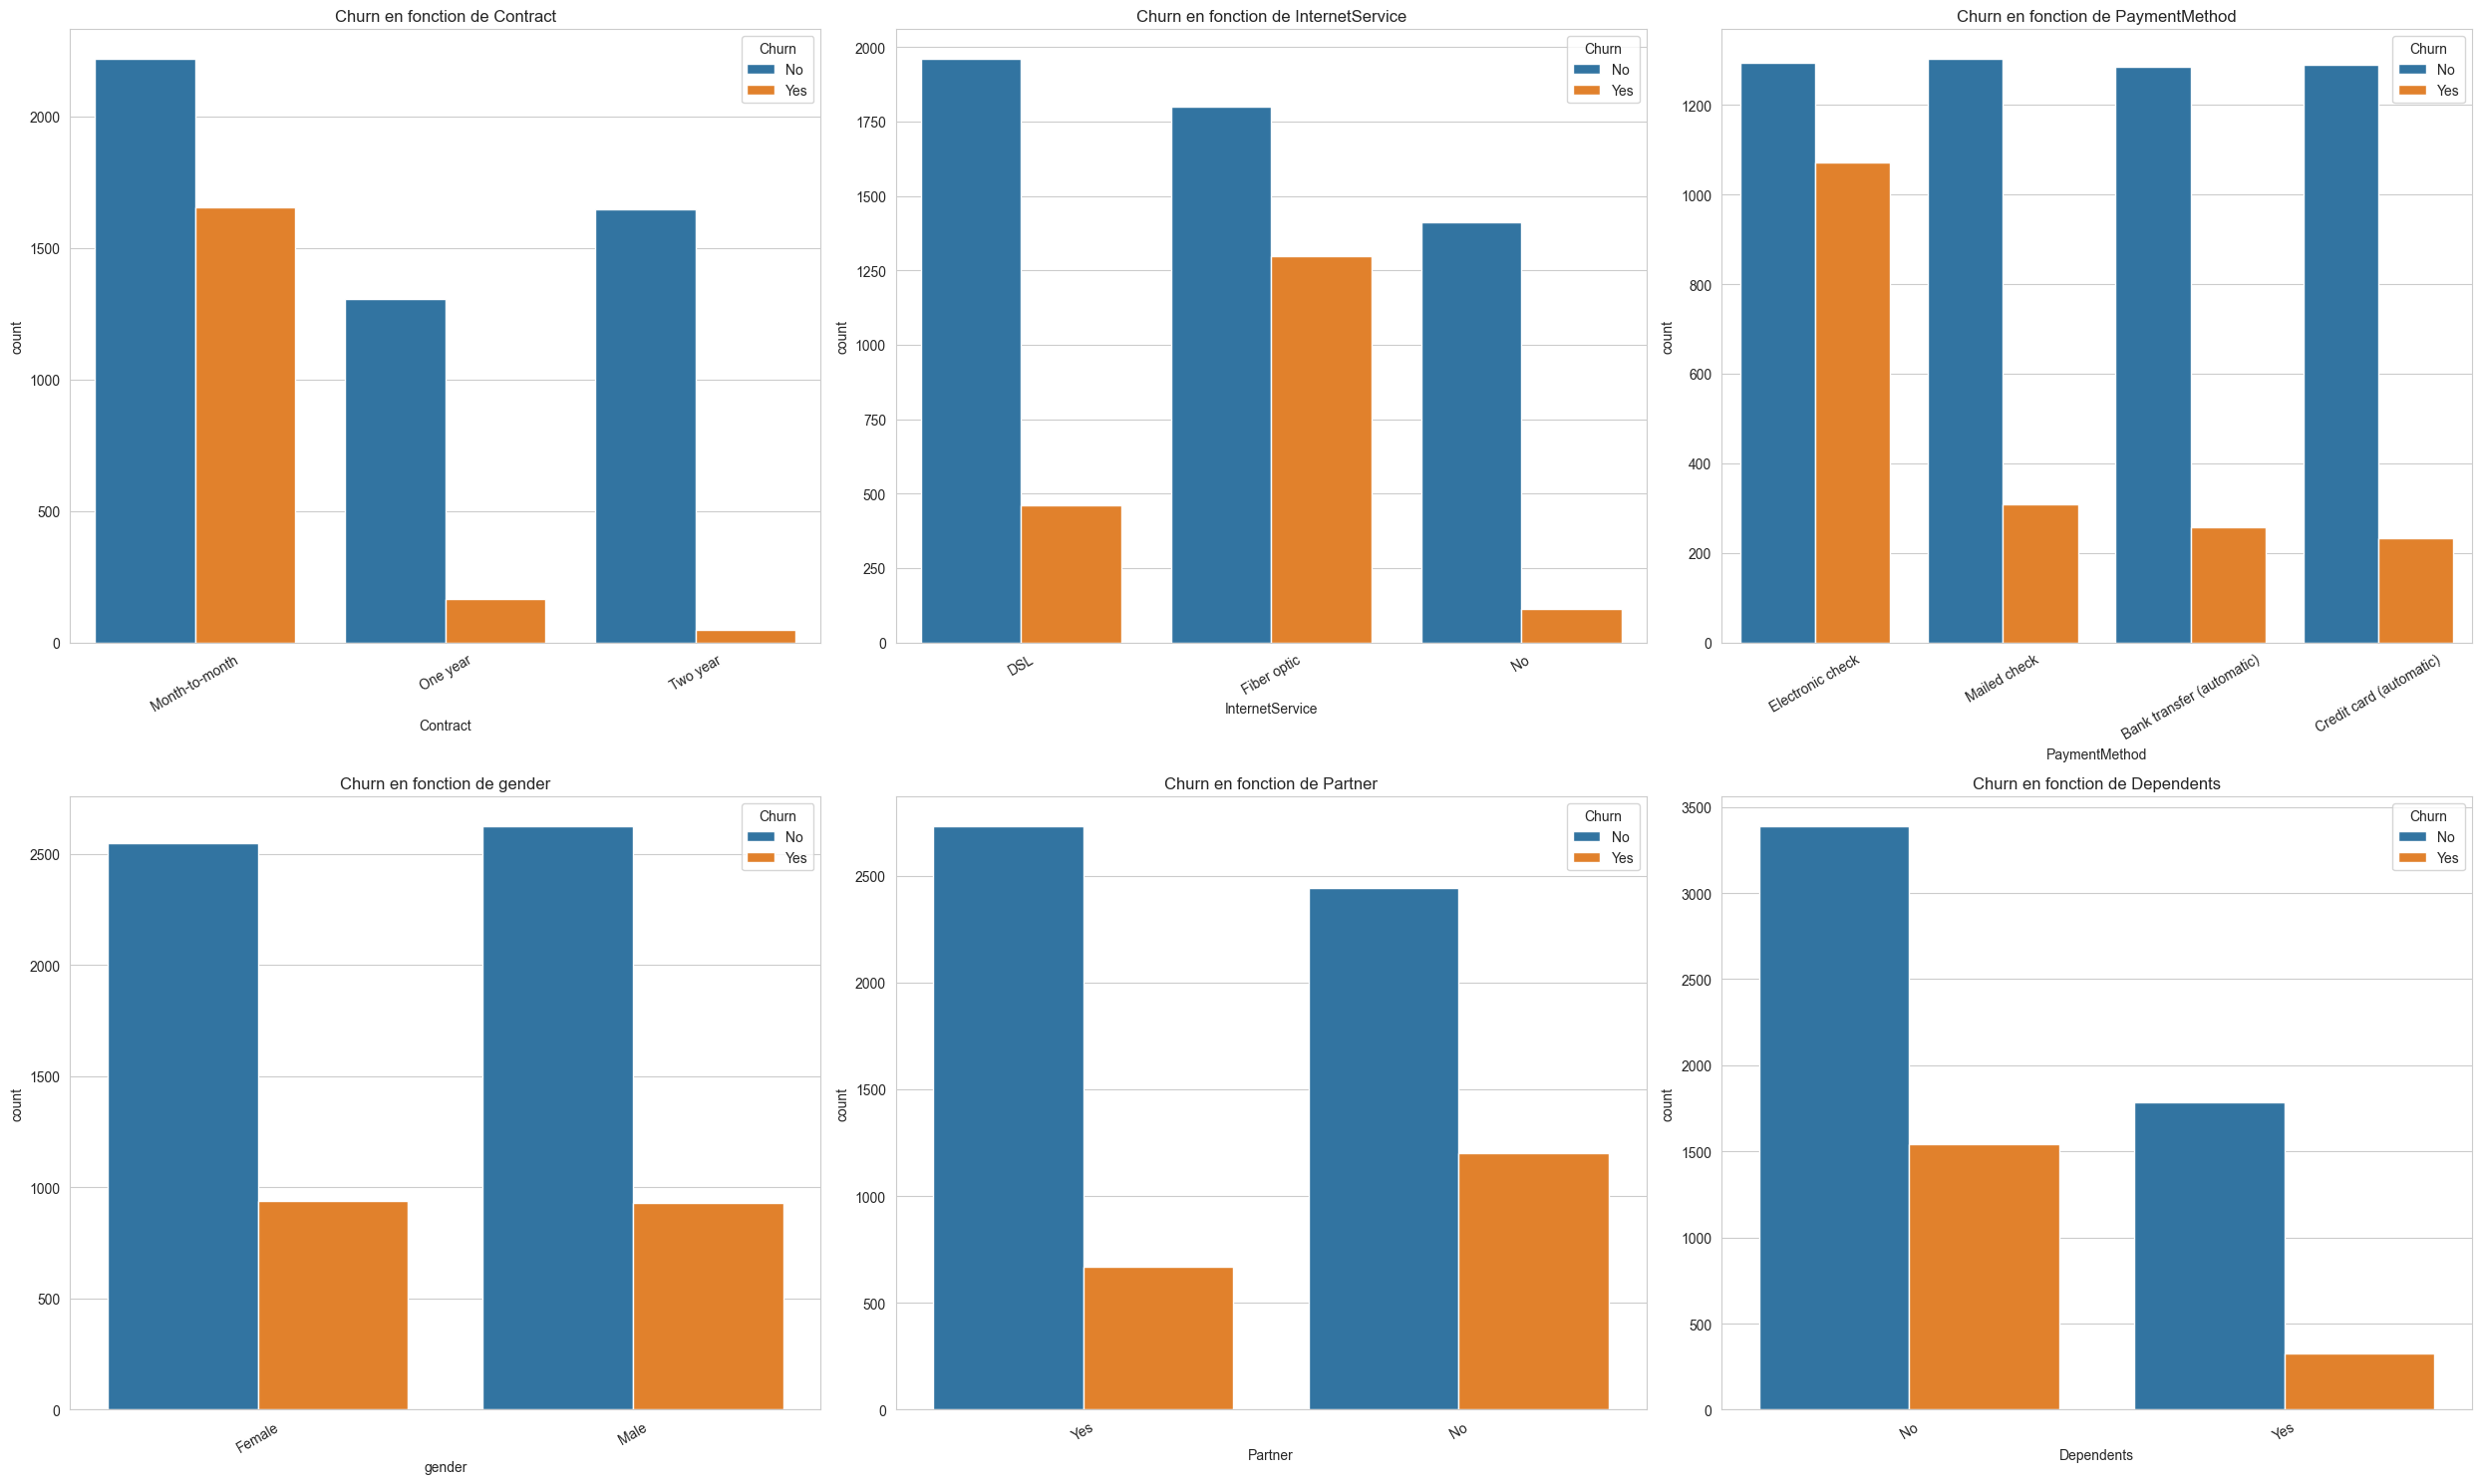

In [8]:
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'gender', 'Partner', 'Dependents']
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn en fonction de {feature}')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

## 7. Matrice de corrélation des variables numériques

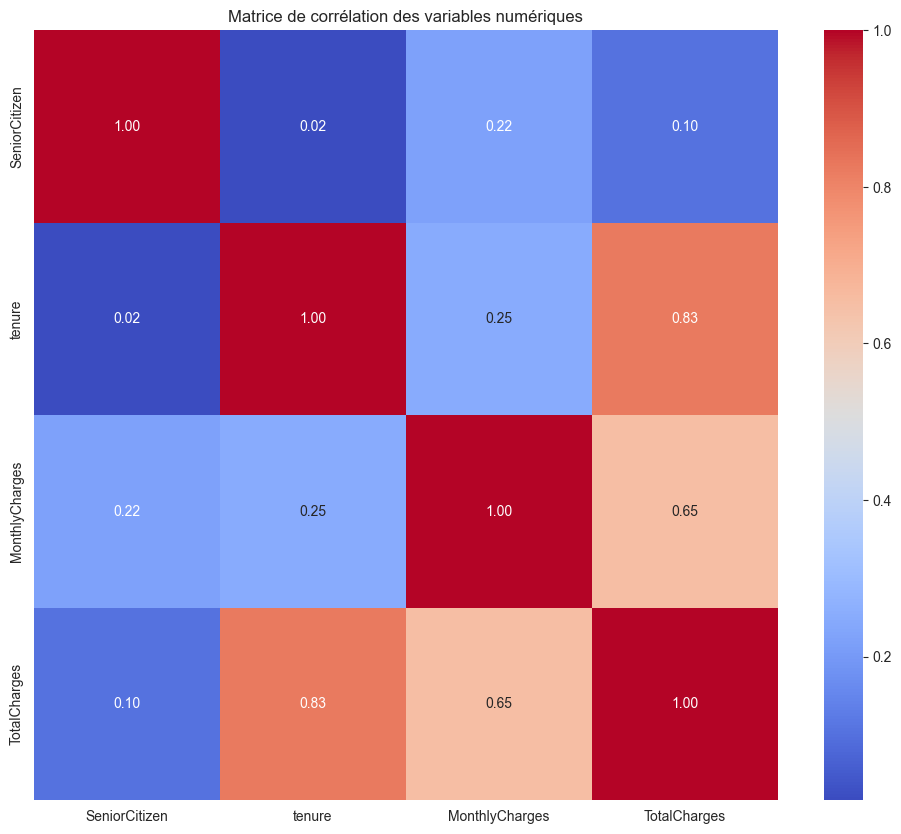

In [9]:
numerical_features = df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.show()